In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras import datasets,layers,models
from keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
train_path = '/content/drive/MyDrive/DeepLearning_Aegis/xray_dataset_covid19/train'
valid_path = '/content/drive/MyDrive/DeepLearning_Aegis/xray_dataset_covid19/test'
test_path = '/content/drive/MyDrive/DeepLearning_Aegis/xray_dataset_covid19/Test1'


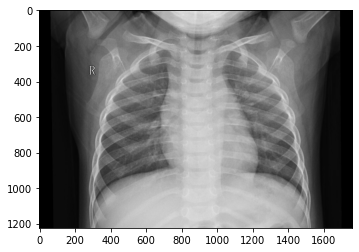

In [9]:
img1 = image.load_img('/content/drive/MyDrive/DeepLearning_Aegis/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg')
plt.imshow(img1)

In [10]:
cv2.imread('/content/drive/MyDrive/DeepLearning_Aegis/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg').shape

(1224, 1762, 3)

### Data

###### Data Loading and preprocessing

In [11]:
train_datagen = ImageDataGenerator(
        rescale=0.001/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

valid_set = train_datagen.flow_from_directory(
        valid_path,
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


###### Reading test image

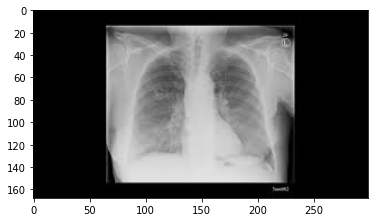

In [50]:
plt.imshow(img_test)

In [ ]:
cv2.imread(test_img).shape

In [12]:
test_img_gen = train_datagen.flow_from_directory(test_path, target_size=(255,255),batch_size=32)

Found 3 images belonging to 2 classes.


### Building CNN Model

In [13]:
cnn = models.Sequential()
#Input
cnn.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(255,255,3)))
cnn.add(layers.MaxPooling2D(2,2))

In [14]:
#Hidden Layer
cnn.add(layers.Conv2D(64,(3,3),activation='relu'))

In [15]:
#Pooling
cnn.add(layers.MaxPooling2D(2,2))

In [16]:
#Flattening
cnn.add(layers.Flatten())

In [17]:
#Establishing full connection
cnn.add(layers.Dense(units=64,activation='relu')) 

In [18]:
#Output Layer
cnn.add(layers.Dense(units=2,activation='softmax'))

In [19]:
#Model Compilation
cnn.compile(optimizer='adam',loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=['accuracy'])

###### Adding Callbacks

In [20]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="accuracy", 
                                        mode ="max", patience = 10, 
                                        restore_best_weights = True)

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                15745088  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

###### Model Fitting

In [ ]:
result = cnn.fit_generator(training_set, 
                           epochs=1,
                           callbacks=[earlystopping],
                           validation_data=valid_set)

In [ ]:
cnn.save_weights('cnn_model_wieghts.h5')
cnn.save('cnn_model_keras.h5')

#### Testing our Model by inserting a Covid identified *image*

In [ ]:
img = image.load_img(test_path)

In [ ]:
plt.imshow(img)

In [ ]:
cnn.predict(test_set)

In [ ]:
len(cnn.weights)